# `Primer Bloque`

Integración numérica o cuadratura.
- El problema a resolver.
- Integrales de una variable.
    - Métodos tipo Newton–Cotes
        - Rectángulo
        - Punto medio
        - Trapecio
        - Simpson
    - Integraciones adaptativas
        - Número de paneles 
        - Integración Gaussiana. Posicionamiento de los nodos y peso. Generalizando el intervalo.
        - Casos Particulares. Funciones periódicas. Singularidades. Intervalos $a\to\infty$, etc.
- Integración multidimensional.
- Comparación con `SciPy`

Al realizar una integración numérica por cuadratura, como veremos más adelante el añadir más puntos nos permite mejorar la resolución de la integral hasta la precisión de máquina. `¿Recuerdan que era la precisión de máquina?`

### El problema a resolver

En ocasiones hemos de conocer el resultado de una integral definida $\int_{a}^{b}f(x)dx$. Como conocen del cálculo, una integral de Riemann no es más que el límite de una sumatoria
$$s=\int_{a}^{b}f(x) dx=\lim_{|\triangle_i|\to 0}\sum_{i=1}^{n} f(x_i)\triangle_i$$

Pues una integración numérica consiste en encontrar la mejor aproximación de tal forma que 
$$s=\int_{a}^{b}f(x) dx \approx \sum_{i=1}^{n-1} c_i f(x_i)$$

donde $x_i$ es el valor nodal y $c_i$ su respectivo peso.

De manera general podemos dividir los diferentes métodos de integrales numéricas en tres tipos, 
- Métodos cerrados, donde los puntos finales de nuestro intervalo ($a$ y $b$) se incluyen como abscisas ($x_i$), ejemplos: `el método del trapezoide y de Simpson`
- Métodos abiertos, donde los puntos finales de nuestro intervalo ($a$ y $b$) no se incluyen como abscisas ($x_i$), ejemplos: `el método del punto medio y la cuadratura gaussiana`
- Métodos semiabiertos, donde uno de los puntos finales de nuestro intervalo (a o b) no está incluido en las abscisas ($x_i$), ejemplos: `el método del rectángulo`.

Uno se puede preguntar cuando utilizar un método o el otro, pues en los casos en que se tenga una singularidad en la integral, podemos dividir su integración en intervalos y escoger un método abierto o semiabierto que nos evite evaluar el punto de la singularidad. 

Una manera más usual de clasificar los métodos es usando los siguientes criterios:
- `Métodos de Newton-Cotes`: asumen que la integral se puede aproximar sumando las áreas de formas (por ejemplo, rectángulos) y suelen implicar abscisas equiespaciadas (En algunos casos no requieren, estrictamente hablando, abscisas equiespaciadas). Son muy útiles cuando $f(x)$ ya ha sido evaluado en puntos específicos de una cuadrícula.
- `Cuadratura gaussiana`: hacen uso de abscisas espaciadas desigualmente. Estos métodos escógen el $x_i$ de tal manera que proporcione una mayor precisión. Como resultado, normalmente requieren menos abscisas y por lo tanto, menos evaluaciones de funciones, lo que los convierte en una opción atractiva cuando una evaluación $f(x)$ es costosa o arrastra errores.

### Métodos tipo Newton-Cotes

Como se comentó, los métodos que entran dentro de esta clasificiación lo que hacen es evaluar la integral como una suma de áreas elementales (rectángulos, trapecios, etc.), asumiendo como conocidos un conjunto de $n$ puntos de datos discretos de la forma $(x_i, f(x_i))$ para $i = 0,1,...,n − 1$ donde 
$$x_i=a+ih$$
con $h=(b-a)/N$, donde $N$ es el número de "paneles": $N=n-1$. 

- `Regla del rectángulo`

El método del rectángulo hace la suposición más simple posible: El área bajo $f(x)$ de $x_i$ a $x_i+1$ se puede aproximar mediante el área de un rectángulo, con el ancho h (la distancia de $x_i$ a $x_i+1$) y la altura dada por el valor de $f(x)$ ya sea en $x_i$ o en $x_i+1$.

<center><img src="capturas/89.png"></center>

Una forma equivalente de ver esto es que la regla del rectángulo aproxima $f(x)$ como una constante de $x_i$ a $x_i+1$, es decir, una línea recta (horizontal). Esto significa que `en lugar de evaluar el área bajo la curva, evalúa el área bajo esa línea recta`.

$$\int_{x_i}^{x_{i+1}}f(x)dx\approx h f(x_i)$$

Como la integral total sería la suma de todas las áreas discretas tendremos 
$$\int_{a}^{b}f(x)dx=\sum_{i=0}^{n-2}\int_{x_i}^{x_{i+1}}f(x)dx\approx h f(x_0)+ h f(x_1)+\dots+ h f(x_{n-2})$$

donde asumimos que todos los puntos estaban equiespaciados por $h$. `¿Por qué n-2?`

Es muy facil percatarse que
$$c_i=h(1, 1, \dots, 1, 0)$$
y que esté método es de la clase semi-abierto pues no incluye el punto final (se puede adaptar para excluir el inicial e incluir el final).

`COMENTARIO 1:` notar como en el límite $h\to 0$ la expresión se reduce a la definición de integral de Riemann. Lo que significa que mientras más pequeño es $h$ la aproximación es mejor (recordar que el límite es la precisión de máquina).


`Errores:`
- Error correspondiente de aproximar el área real (debajo de la sección de la curva) por la del panel $i-$esimo es 
$$\epsilon_i=\frac{h^2 f'(\psi_i)}{2}$$

donde $x_i<\psi_i<x_{i+1}$. Este error se le suele llamar `Error por truncamiento`.

- Error absoluto de la integración se puede computar como
$$\epsilon=\frac{b-a}{2}h f'(\psi)$$

A este error se le suele llamar `Error por redondeo` puesto que es consecuencia de sumar cada panel.

- `Regla del punto medio`

Similar a lo visto en el caso de la derivada (notar que la regla del rectángulo también es hacia adelante/atrás), podemos definir una regla del punto medio. Esta regla asume la misma suposición que la regla del rectángulo: el área bajo $f(x)$ de $x_i$ a $x_i+1$ puede aproximarse por el área de un rectángulo, con ancho $h$ y altura $f(x)$. La única diferencia es que ahora $x$ es el punto medio entre $x_i$ y $x_i+1$.
<center><img src="capturas/90.png"></center>

Como se puede apreciar ahora de la imagen, este pequeño cambio mejora sustancialmente la aproximación

$$\int_{x_i}^{x_{i+1}}f(x)dx\approx h f(x_i+\frac{h}{2})$$

`Errores:`
- Error por truncamiento
$$\epsilon_i=\frac{h^3 f''(\psi_i)}{24}$$

- Error por redondeo
$$\epsilon=\frac{b-a}{24}h^2 f''(\psi)$$


`Regla del trapecio`

La regla del trapecio o regla trapezoidal entra dentro de la clasificación de fórmulas cerradas y asume que el área bajo la curva $f(x)$ se puede aproximar por la de un trapecio
<center><img src="capturas/91.png"></center>

Recordando que para un trapecio $A=h*(B+b)/2$, tendremos que
$$\int_{x_i}^{x_{i+1}}f(x)dx\approx \frac{h}{2}[f(x_i)+f(x_{i+1})]$$

Notar que esta fórmula implica que cada uno de los dos puntos que componen nuestro intervalo elemental tiene el mismo peso. 

Sumando todos los paneles tendremos:

$$
\int_{a}^{b}f(x)dx=\sum_{i=0}^{n-2}\int_{x_i}^{x_{i+1}}f(x)dx\approx \frac{h}{2} f(x_0)+ h f(x_1)+ h f(x_2)+\dots+ h f(x_{n-2})+\frac{h}{2}f(x_{n-1})
$$

`Por qué solo` $x_0, x_{n-1}$ `tienen peso 1/2?`


Es muy facil percatarse que
$$c_i=h\bigg(\frac{1}{2}, 1, \dots, 1, \frac{1}{2}\bigg)$$
y que esté método es de la clase cerrado pues incluye todos los puntos.

`Errores:`
- Error por truncamiento
$$\epsilon_i=-\frac{h^3 f''(\psi_i)}{12}$$

- Error por redondeo
$$\epsilon=-\frac{b-a}{12}h^2 f''(\psi)$$

- `Regla de Simpson (1/3)`

Como se pudo apreciar, el método del trapecio une con una línea recta los puntos $x_i$ y $x_{i+1}$. Este procedimiento se puede ver como aproximar la curva real por un polinomio de grado $1$. La regla de Simpson (1/3) extiende esta idea y nos da una aproximación más precisa al conectar grupos sucesivos de tres puntos sobre la curva mediante polinomios de grado $2$ (parábolas). De tal forma que la integral se aproxima como la suma del área de todas las parábolas.

<center><img src="capturas/92.png"></center>

Consideremos dos paneles, equivalentemente tres puntos consecutivos $(x_i, f(x_i)), (x_{i+1}, f(x_{i+1})), (x_{i+2}, f(x_{i+2}))$, tendremos que la integral de la función real en el intervalo $x_{i}, x_{i+2}$ se puede aproximar al área sombreada bajo una parábola que pasa por los tres puntos

<center><img src="capturas/93.png"></center>

Veamos como obtener la expresión matemática (más adelante en interpolación retomaremos esta metodología).

Partiendo de la expresión general para una parábola 
$$p(x)=a_0+a_1x+a_2x^2$$
si integramos esta expresion en el intervalo $x_i, x_{i+2}$ tendremos
$$
\int_{x_i}^{x_{i+2}} p(x) dx=\bigg(a_0 x+\frac{a_1 x^{2}}{2}+\frac{a_2 x^3}{3}\bigg)_{x_{i}}^{x_{i+2}}=2 a_0 h+2a_1h(h+x_i)+\frac{2}{3}a_2h(4h^2+6hx_i+3x_i^2)
$$

donde se usó que $x_{i+2}=x_i+2h$. Puesto que el polinomio debe pasar por los tres puntos, es decir se ha de cumplir que $p(x_i)=f(x_i), p(x_{i+1})=f(x_{i+1})$ y $p(x_{i+2})= f(x_{i+2})$, se puede computar las tres constantes (ver notebook de mathematica) y sustituirlas en la ecuación anterior, lo que nos da 
$$\int_{x_i}^{x_{i+2}}f(x)dx\approx \frac{h}{3}[f(x_i)+4f(x_{i+1})+f(x_{i+2})]$$
donde se usó que $x_{i+1}=x_i+h$.

Finalmente si sumamos todos los paneles tendremos 
$$
\int_{a}^{b}f(x)dx=\sum_{i=0, 2, 4}^{n-3}\int_{x_i}^{x_{i+2}}f(x)dx\approx \frac{h}{3} f(x_0)+ \frac{4h}{3} f(x_1)+ \frac{2h}{3} f(x_2)+\dots+ \frac{2h}{3}f(x_{n-3})+ \frac{4h}{3} f(x_{n-2})+\frac{h}{3}f(x_{n-1})
$$

Nótese como el peso de los puntos finales $x_0, x_{n-1}$ es el mismo $h/3$, mientras que los intermedios $x_{i+1}$ tienen un peso de $4h/3$, algo que no ocurre con los "coincidentes" ($x_{i+2}$ sin incluir los extremos) los cuales van pesado por un término $2h/3$.

Es muy facil percatarse que
$$c_i=\frac{h}{3}(1, 4, 2, 4, \dots, 2, 4, 1)$$
y que esté método es de la clase cerrado pues incluye todos los puntos.

`IMPORTANTE:` para usar esta metodología hay que garantizar que se cuenta con un número par de paneles (impar de puntos).

`Errores:`
- Error por truncamiento
$$\epsilon_i=-\frac{h^5 f^{(4)}(\psi_i)}{90}$$

- Error por redondeo
$$\epsilon=-\frac{b-a}{180}h^4 f^{(4)}(\psi)$$

Nótese como este método tiene un error de orde $O(h^{4})$ menor a todos los anteriores. Adicionalmente el (1/3) es debido al peso del primer punto.

La Regla de Simpson (1/3) se puede extender al polinomio cúbico `Regla de Simpson (3/8)` (donde ahora necesitamos tres paneles) o incluso usar un polinómio cuártico (cuatro paneles) `Regla de Boole`. El procedimiento para obtener las expresiones es similar al (3/8), para detalles ver notebook Mathematica. A continuación se presenta un resumen:

<center><img src="capturas/94.png"></center>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
def wights(name):
    pesos = {'rect': (1, 1),  # (peso para 0 y -1, (pesos intermedio, (indice inicio, salto)), peso global)
             'ptoMed': (1, 1),
             'trap': (1/2, 1),
             'simp1/3': (1/3, (4/3, (1, 2)), 2/3),
             'simp3/8': (3/8, (6/8, (3, 3)), 9/8),
             'boole': (14/45, (24/45, (2, 4)), (28/45, (4, 4)), 64/45)}
    return pesos[name]

def numPanel(name):
    paneles = {'rect': 1,
             'ptoMed': 1,
             'trap': 1,
             'simp1/3': 2,
             'simp3/8': 3,
             'boole': 4}
    return paneles[name]
    
def check1(name, Npts):
    """
    Check of f is a object type function and inter have len two
    """
    try:
        NpanelNec = numPanel(name)  # si el nombre no está da un KeyError y ejecuta la except 
        if (Npts-1)%NpanelNec or Npts<2:
            sys.exit("ERROR: el número de paneles debe ser múltiplo de %d"%NpanelNec)  
    except KeyError:
        print("ERROR: El método de integración escojido no se encuentra en la lista")
        

In [5]:
def rect_trap(f, interv, Npts, name='trap', info=False):
    """ 
    """
    a, b = interv
    h = (b-a)/(Npts-1)
    
    if name == 'rect':
        Npts = Npts-1
        xi = a + np.arange(Npts)*h  # recordar que esta era la forma más optima
    elif name == 'ptoMed':
        Npts = Npts-1
        xi = a + (np.arange(Npts) + 1/2)*h
    else:
        xi = a + np.arange(Npts)*h
    yi = f(xi)
    
    pesos = wights(name)
    cs = np.ones(Npts)*pesos[-1]
    cs[0], cs[-1] = pesos[0], pesos[0]
    if info:
        print(pesos)
        print(cs)
    
    contribs = cs*yi*h
    return np.sum(contribs)

def simpsons(f, interv, Npts, name='simp1/3', info=False):
    """ 
    """
    a, b = interv
    h = (b-a)/(Npts-1)
    
    xi = a + np.arange(Npts)*h
    yi = f(xi)
    
    pesos = wights(name)
    cs = np.ones(Npts)*pesos[-1]
    cs[0], cs[-1] = pesos[0], pesos[0]
    
    for i in range(1, len(pesos)-1):
        pesoi, (ind0, jump) = pesos[i]
        if info:
            pesoi, (ind0, jump)
        cs[ind0:-1:jump] = pesoi
    
    if info:
        print(cs)
        
    contribs = cs*yi*h
    return np.sum(contribs)

In [6]:
def mainInteg(f, interv, Npts, name='simp1/3', info=False):
    """ 
    f: it is the f(x) function
    interv: the interval [a, b] that we used for integrate. Note that for rect, and centr, the interval it is [a, b)
    Npts: numbers of point of the discretization
    name: integration rules {'rect', 'trap', 'simp1/3', 'simp3/8', 'boole'}
    """
    check1(name, Npts)
    
    if name in ['rect', 'ptoMed', 'trap']:
        val = rect_trap(f, interv, Npts, name=name, info=info)
    else:
        val = simpsons(f, interv, Npts, name=name, info=info)
    return val

In [7]:
def f(x):
    return 1/np.sqrt(x**2+1)

result = []

interv = [0., 1.]
Npts = 51

for name in ('rect', 'ptoMed', 'trap', 'simp1/3'):
    val = mainInteg(f, interv, Npts, name=name)
    result.append([name, val])
    print('===> ', name)
    print(val)
    
Npts = 52
for name in ('simp3/8', ):  # quitar la coma y ver que pasa
    val = mainInteg(f, interv, Npts, name=name)
    result.append([name, val])
    print('===> ', name)
    print(val)
    
Npts = 53
for name in ('boole', ):
    val = mainInteg(f, interv, Npts, name=name)
    result.append([name, val])
    print('===> ', name)
    print(val)

===>  rect
0.8842907340357442
===>  ptoMed
0.8813794796276012
===>  trap
0.8813618018476097
===>  simp1/3
0.8813735872550066
===>  simp3/8
0.8813735875085325
===>  boole
0.8813735870201473


Como saben la respuesta a esta integral es 
$$\int_{0}^{1} \frac{1}{\sqrt{x^2+1}}=-\ln(\sqrt{x^2+1}-1)\bigg|_{0}^{1}=Arsinh(x)\bigg|_{0}^{1}=0.881373587019543-0=0.881373587019543$$

In [130]:
truv = 0.881373587019543
for i in result:
    name, val = i
    print('===> ', name)
    print(abs(truv-val))

===>  rect
0.0029171470162011603
===>  ptoMed
5.892608058166715e-06
===>  trap
1.178517193334283e-05
===>  simp1/3
2.354635375567682e-10
===>  simp3/8
4.889894045234655e-10
===>  boole
6.042943923034727e-13


Como se aprecia el método del `rectángulo` tiene un error absoluto del orden $10^{-3}$ (difiere en el tercer dígito), ahora bien para el método del `punto medio` si recuerdan el error era del orden de $h^2$, lo cual es concordante ya que su error absoluto es del orden $10^{-6}$ (recordar que usamos la misma $h$ para todos). Algo similar pasa con el método del `trapecio` (error $h^2$). Caso especial tienen los métodos de Simpson, los cuales como vimos tiene un error del orden $h^4, h^4, h^7$ respectivamente y en este caso son los que menor error tienen (notar que hay factores numéricos delante por eso no se cumple exactamente).

`Ejercicio`:

Calcule el número de iteraciones mínimas necesarias para resolver numericamente la integral 
$$\int_{0}^{1} e^{-x^2} dx$$

por el método del trapecio de tal forma que el error sea menor a $5\times 10^{-5}$.


`Tips`

Sabemos que 
$$
val = \int_{a}^{b}f(x)dx=\sum_{i=0}^{n-2}\int_{x_i}^{x_{i+1}}f(x)dx\approx \frac{h}{2} f(x_0)+ h f(x_1)+ h f(x_2)+\dots+ h f(x_{n-2})+\frac{h}{2}f(x_{n-1})
$$

por tanto la cota superior del error ha de ser:
$$
\bigg|val - \int_{a}^{b}f(x)dx \bigg|\leq \bigg|\frac{(b-a)^3}{12 N^2} k \bigg|\leq 0.005
$$
donde $k$ es el máximo valor (o cota superior) que puede tomar $f''(\psi)$. Notar que usamos el hecho de que $h=(b-a)/N$. Lo que sigue es calcular la cota $k$ y despejar $N$ de tal forma que satisfaga la condición. Comentarios $f''(x)=2e^{-x^2}(2x^2-1)$ lo que implica que el extremo superior está en $x=0 \to k=2$ (se ha de analizar la función, y se nota que es creciente en el intervalor $[0, 1]$, y $f''(1)=2/e$ ). Finalmente llegaremos a que $N>5.8$, es decir, si tomo $N=6$ aseguro que el error absoluto respecto al valore real es menor que $0.005$. 

Veamos:

La integral 
$$
val(x) = \int e^{-x^2}dx= \frac{\sqrt{\pi}}{2}Erf(x)
$$
donde $Erf(x)$ es la función error. Para el intervalor $[0, 1]$ tendremos que $val\approx 0.7468241328124234$. `Comentario:` si los límites fueran más menos el infinito, sería una forma de calcular el valor de $\pi$.

In [151]:
# probemoslo
f = lambda x: np.exp(-x**2)

valtr = 0.7468241328124234
interv = [0, 1]
Npts = 6+1

val = rect_trap(f, interv, Npts, name='trap')

print('Valor = ', val, 'Error = ', abs(valtr-val))
abs(valtr-val)<0.005

Valor =  0.7451194124361791 Error =  0.001704720376244362


True

### Integraciones Adaptativas


#### Número de paneles

Anteriormente se presentaron diferentes métodos de integración notándose que la precisión del resultado estaba correlacionado con el número de paneles $N$ (o el tamaño del paso $h$) siendo lógico pensar que el considerar el doble de estos mejoraría la aproximación de la integral

\begin{equation}
h_N=\frac{b-a}{N},\qquad \to \qquad h_{N'}=\frac{b-a}{N'}=\frac{b-a}{2N}=\frac{h_N}{2}
\end{equation}

Como se esperaba, al considerar dos veces el número de paneles iniciales, se reduce a la mitad el tamaño del paso $h_{N'}=h_{N}/2$. Una reducción también ocurre en el error de la aproximación, por ejemple, para Simpson($1/3$) sabemos que el error por redondeo 
$$\epsilon\sim h^4$$

lo que implica que el resultado de la integración es:
$$
I = I_N\pm c h^{4}_{N},
$$

donde $I_N$ es la aproximación numérica con $N$ iniciales paneles, y $c$ una constante relacionada con los extremas, y la derivada superior correspondiente.

Ahora, si duplicamos el número de paneles tendremos que:
\begin{equation}
I = I_{N'}\pm c h^{4}_{N'}, \quad \to \quad I_N\pm c h^{4}_{N}= I_{N'}\pm c h^{4}_{N'}\quad \to \quad I_{N'}-I_N=\pm 15 c h^{4}_{N'}
\end{equation}

donde se usó que $h_{N} = 2 h_{N'}$. 

Finalmente como el error por redondeo es $\epsilon_{N'}\sim c h_{N'}^4$ tendremos que
\begin{equation}
\epsilon_{N'} =\frac{I_{N'}-I_N}{15}
\end{equation}

lo cual nos permite estimar el error para nuestro resultado con $N'$ paneles usando el propio resultado conjunto con el computado para $N$ paneles. En resumen, usando esta metodología podremos deducir el valor de $N$ para que cumpla con la precisión requerida.

`Tarea:` Probar que para los métodos
- Trapecio: $\epsilon_{N'} =(I_{N'}-I_N)/3$
- Rectángulo: $\epsilon_{N'} =I_{N'}-I_N$

Usando el resultado anterior creemos entonces una rutina que nos permita usar un integrador adaptativo:

In [24]:
def adaptive(f, interv, name, kmax=30, tol=1.e-8, Npts=11, inf=False):
    """
    met -> {'rect', 'trap', 'simp1/3', 'simp3/8', 'boole'}
    """
    functodenom = {'rect': 1, 'trap': 3, 'simp1/3': 15}  # 'simp3/8', 'boole'
    denom = functodenom[name]
    
    val = mainInteg(f, interv, Npts, name=name)
    for _ in range(kmax):
        Nptsprime = 2*Npts-1  # recordar que N = n-1, N' = n'-1 como N' = 2N -> n' = 2n-1
        valprime = mainInteg(f, interv, Nptsprime, name=name)
        err = abs(valprime-val)/denom
        err /= abs(valprime)  # error relativo
        if inf:
            print(Nptsprime, valprime, err)
        
        if err<tol:
            break
        else:
            Npts, val = Nptsprime, valprime  # se actualizan los valores iniciales
            valprime = None
    
    if valprime is None:
        print('NO SE ENCONTRÓ UN VALOR CON LA PRECISIÓN SOLICITADA')
    return valprime

In [25]:
def f(x):
    return 1/np.sqrt(x**2+1)

result = []

interv = [0., 1.]
Npts = 51

for name in ('rect', 'trap', 'simp1/3'):
    val = mainInteg(f, interv, Npts, name=name)
    result.append([name, val])
    print('===> ', name)
    print(val)
    
    
print('\n'+'#'*10+'\n')

result2 = []
for name in ('rect', 'trap', 'simp1/3'):
    val = adaptive(f, interv, name, inf=False)
    result2.append([name, val])
    print('===> ', name)
    print(val)

===>  rect
0.8842907340357442
===>  trap
0.8813618018476097
===>  simp1/3
0.8813735872550066

##########



===>  rect
0.8813735940026612
===>  trap
0.8813735825238792
===>  simp1/3
0.8813735875940777


### Integración Gaussiana

Con anterioridad vimos que los métodos de Newton-Cotes discretizan el eje de las abscisas ($x$) en cuadrícula espaciada uniformemente diferenciandose sólo en los pesos $c_i$ que emplean; estos últimos se eligen para integrar exactamente un polinomio de cierto grado. 

En contraposición a esto, los métodos de cuadratura Gaussiana introducen también como grado de libertad ya no solo los $n$ puntos $x_i$, sino también los $n$ pesos $c_i$, de tal forma que podremos aproximar todos los polinomios hasta el grado $2n − 1$. Es decir, para cinco puntos $n = 5$ podremos integrar todos los polinomios hasta el noveno orden. La razón del porque esto es posible, es debido a que hemos duplicado el número de parámetros a nuestra disposición: podemos usar los $2n$ parámetros (los $x_i$ y los $c_i$) para manejar encontrar las $2n − 1$ constante de los polinomios.

Para ejemplificar la metodología concideremos el intervalo simétrico $a = −1, b = 1$
$$\int_{-1}^{1} f(x)dx\approx \sum_{k=0}^{n-1} c_k f(x_k)$$

La elección de las $c_k, x_k$ nos permitirá integrar los polinomios hasta el grado $2n − 1$ exactamente. Es necesario señalar que todos los métodos de cuadratura Gaussianos son abiertos, por lo que los $x_k$ no deben identificarse con $−1$ y $+1$.

Comencemos con el caso más sencillo, dos puntos ($n=2$)
$$\int_{-1}^{1} f(x)dx=c_0f(x_0)+c_1f(x_1).$$

Las cantidades $c_i, x_i$ deben ser determinadas. Dado que los métodos de cuadratura Gaussianos son abiertos, $x_0$ y $x_1$ estarán en el intervalo $(a, b)$. 


Partiendo de la primisa que todos los polinomios hasta el orden $2n − 1 = 3$ puedan integrarse exactamente usaremos monomios

<center><img src="capturas/95.png"></center>

Lo que nos lleva asumiento la integral anterior es válida para cada uno de los monomios al siguiente sistemas de ecuaciones
<center><img src="capturas/96.png"></center>

resolviendo el sistema se llega a
<center><img src="capturas/97.png"></center>

lo que implica que
<center><img src="capturas/98.png"></center>

A este punto es necesario señalar que a diferencia del método de Simpson (1/3) donde se integró usando polinomios hasta el tercer orden, y se necesitaban al menos $3$ puntos, en este ejemplo solo necesitamos dos. Adicionalmente nótese que no fue necesario obtener la expresión para un panel y luego extenderla para los demás, esta solución es general.

`IMPORTANTE:` Este enfoque se puede intentar generalizar para $n>2$ lo que conduciría a un sistema de ecuaciones cada vez más no lineal (¿qué es no lineal?). De hecho, para resolverlo se pueden utilizar diferentes metodologías p.ej. mediante la matriz de `Vandermonde` o los `polinómios ortogonales` o el algoritmo de `Golub-Welsch`.

#### Posicionamiento de los nodos y peso

Similar al caso método Newton-Cotes, podemos realizar una especie de interpolación posicionando los nodos en valores particulares. En este caso, se usará la interpolación de Hermite, la cual permite expresar un polinomio de grado $2n-1$ como
<center><img src="capturas/99.png"></center>

donde los términos $\alpha_{k}(x)$ y $\beta_{k}(x)$ son los coeficientes del polinomio que abordaremos en mayor profundidad cuando veamos interpolación. 


Si aproximamos la integral por el polinómio, tendremos que la integral de la función desde $-1$ hasta $1$, se puede expresar como
<center><img src="capturas/100.png"></center>

donde 
<center><img src="capturas/101.png"></center>

Ahora, como se aprecia tenemos la primera derivada de la función y pues de alguna forma hemos de removerla, lo que se traduce en que sean cero los $d_k$, quedándonos entonces a la izquierda la integral que deseamos conocer, y a la derecha la aproximación mediante una sumatoria donde los $c_k$ serían los pesos.

El término $d_k$ puede expresarse (como veremos en interpolación) en términos de los polinomios cardinales $\beta_k(x)$ según la ecuación
<center><img src="capturas/102.png"></center>

donde los $x_k$ son los nodos de interpolación y $L_k(x)$ los polinomios cardinales definidos para esos nodos. También se usó la relación
<center><img src="capturas/117.png"></center>


Usando la definición de los nodos polinomiales
<center><img src="capturas/103.png"></center>

donde tendremos un polinomio mónico en $x$ de grado $n$, que desaparece en los nodos de interpolación $x_j$ (como deseamos). Adicionalmente usamos usamos la defincion de los polinomios cardinales:

<center><img src="capturas/104.png"></center>

lo cual nos da un polinomio en $x$ de grado $n-1$. 

Usando el hecho de que la relación
<center><img src="capturas/105.png"></center>

es cierta para $r_{n-1}(x)$, un polinomio de grado $n-1$ y $q_n$ un polinomio ortogonal de grado $n$. Pues tendremos entonces que si garantizamos que $L(x)$ sea un polinomio ortogonal, pues podremos asegurar que $d_k=0$. 

Para garantizar lo anterior usarémos la libertad de escoger los nodos de interpolación, $x_k$: si los tomamos como los ceros del polinomio ortogonal de grado $n$, entonces L(x) será el único polinomio mónico de grado $n$. Es decir, ortogonal (en el intervalo $[−1, +1]$) a todos los polinomios de grado $n − 1$ o menos. En ese caso, todos los $d_k$ desaparecerán llegandose a:

<center><img src="capturas/106.png"></center>

A este punto es importante señalar que los ceros de $L(x)$ son los ceros del polinomio de Legendre $P_n(x)$ (fórmula de Rodrigues)

<center><img src="capturas/107.png"></center>


`Peso:` Usando diferentes propiedades de los polinomios de Legendre , se puede probar que el peso vendrá dado por

<center><img src="capturas/111.png"></center>

Notar que se requiere el valor de la derivada del polinomio de Legendre grado uno.

`Error:`
<center><img src="capturas/112.png"></center>


### Generalizando el intervalo.

Nuestro resultado anterior fue computado para el intervalo $[-1, 1]$ y de hecho, usamos esa propiedad para eliminar $d_k$. Pues de manera general si queremos seguir utilizando el resultado anterior para un intervalo $[a, b]$ debemos reescalar nuestras variables como

<center><img src="capturas/113.png"></center>

diferenciando tendremos

<center><img src="capturas/114.png"></center>

Lo que nos lleva a 
<center><img src="capturas/115.png"></center>

Utilizando el resultado anterior tendremos:

<center><img src="capturas/116.png"></center>

`RESUMIENDO:` El cálculo de $\int_{-1}^{1} f(x)dx$ por cuadratura Gaussiana aproxima la integral
$$\int_{-1}^{1} f(x)dx\approx \sum_{i=0}^{n} c_k f(x_k)$$

donde $c_k$ son los pesos y $x_k$ las raices del polinomio (de Legendre) de grado $n+1$, es decir $P_{n+1}$. Donde $P_0(x) = 1$ y $P_k(1)=1, \forall k\geq0$. Este polinomio ha de cumplir que  
$$\int_{-1}^{1} x^{k}P_{n+1}=0 \quad \forall k\in {0, 1, \dots, n}$$

Para generalizar lo anterior a un intervalo arbitrario, se usa un reescalamiento de la variable independiente.

## Implementación de los Códigos

Para generar los polinomios usemos la Relación de recurrencia de Bonnet. Esta fórmula de recursividad es útil para evitar la pérdida de dígitos significativos en los cálculos. 

Una manera fácil de obtener la expresión es partir de la función generadora de polinomios de Legendre (los polinomios de Legendre se pueden definir como los coeficientes en una expansión en potencias de $t$)
$$
g(x, t)=\frac{1}{\sqrt{1-2xt+t^2}}=\sum_{n=0}^{\infty}P_{n}(x) t^{n}
$$
donde $P_{n}$ es un polinomio de $x$ de grado $n$ con $|x|\leq 1$. Notar que si $n=1 \to (t=1)$, tendremos $P_0(x)=1, P_1(x)=x$. 

Derivando con respecto a $t$ la expresión $g(x, t)$ llegamos a
$$
\frac{x-t}{\sqrt{1-2xt+t^2}}=(1-2xt+t^2)\sum_{n=0}^{\infty} n P_{n}(x) t^{n-1}
$$

Ahora, si utilizamos la función generadora de polinomios e igualando coeficientes de igual potencia en $t$ llegamos a la Relación de recurrencia de Bonnet (`Ver documentación extra adjuntada para detalles`):
$$ (n+1) P_{n+1}(x)=(2n+1)x P_{n}(x)-n P_{n-1}(x)$$

la cual se puede escribir como: 
<center><img src="capturas/118.png"></center>

donde para no confundir con el número de puntos usamos $n\to j$ y $j=1, 2, \dots, n-1$. Notar que no ponemos $j=0$ porque se obtiene $P_1(x)$ y $P_0(x)$ que ya se obtuvieron.

De manera similar podemos obtener una serie recurrente para la derivada con respecto a $x$, para ello derivemos la función generadora ($g(x, t)$):
$$
\frac{\partial g(x, t)}{\partial x}=\frac{t}{(1-2xt+t^2)^{3/2}}=\sum_{n=0}^{\infty}P_{n}'(x) t^{n}
$$
operando y usando la expresion para $g(x, t)$ se llega a 
$$
t\sum_{n=0}^{\infty}P_{n}(x) t^{n}=(1-2xt+t^2)\sum_{n=0}^{\infty}P_{n}'(x) t^{n}
$$
De donde igualando coeficientes de igual potencia en $t$ llegamos a 
$$
P_{n+1}'(x)+P_{n-1}'(x)=P_{n}(x)+2x P_{n}'(x)
$$
con $n=1, 2, \dots$

A continuación derivamos con respecto a $x$ la Relación de recurrencia de Bonnet 
$$ (n+1) P_{n+1}'(x)+n P_{n-1}'(x)=(2n+1) P_{n}(x)+ (2n+1) x P_{n}'(x)$$

Usando estas últimas dos ecuaciones y realizando ciertas operaciones algebraicas (`Ver documentación extra adjuntada para detalles`), se llega a:
$$
P_{j}'(x)=\frac{j P_{j-1}(x)-j x P_{j}(x)}{1-x^2}
$$
donde ahora $j=2, 3, \dots$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# códigos
def boonetRec(n, x):
    # añadir check n>1
    val0, val1 = 1, x
    
    for j in range(1, n):
        val2 = ((2*j+1)*x*val1 - j*val0)/(j+1.)
        val0, val1 = val1, val2 
    return val0, val1  # notar que ahora val0 es val1, et

def legendre(n, x):
    if n==0:
        valn = 1. if isinstance(x, (int, float)) else [1.]*len(x)
        dvaln = 0. if isinstance(x, (int, float)) else [0.]*len(x)
    elif n==1:
        valn = x
        dvaln = 1. if isinstance(x, (int, float)) else [1.]*len(x)
    else:
        valn_m1, valn = boonetRec(n, x)
        dvaln = n*(valn_m1-x*valn)/(1.-x**2)  # derivada
    return valn, dvaln

/var/folders/m_/bkm6rtjj0f104l91yr9n6t2c0000gn/T/ipykernel_8797/176916057.py:20: RuntimeWarning: invalid value encountered in divide
  dvaln = n*(valn_m1-x*valn)/(1.-x**2)  # derivada


(-4.0, 4.0)

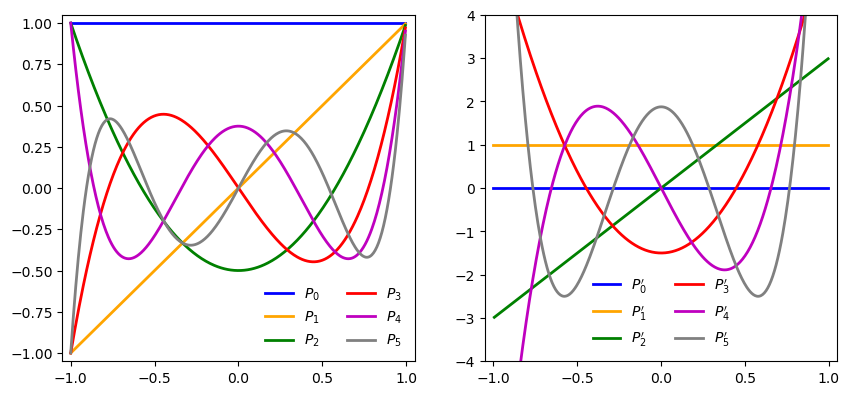

In [45]:
colors = ['blue', 'orange', 'green', 'red', 'm', 'gray']

step = 1/200
xval = np.arange(-1, 1, step)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5),
                       sharex=True, sharey=False,
                       gridspec_kw=dict(hspace=0, wspace=.2))

for n in range(6):
    yval, dyval = legendre(n, xval)
    ax[0].plot(xval, yval, c=colors[n], label=r'$P_{%d}$'%n, lw=2)
    ax[1].plot(xval, dyval, c=colors[n], label=r'$P_{%d}^{\prime}$'%n, lw=2)

ax[0].legend(frameon=False, ncols=2)
ax[1].legend(frameon=False, ncols=2)
ax[0].set_xlim(-1.05, 1.05)
ax[0].set_ylim(-1.05, 1.05)
ax[1].set_ylim(-4, 4)

¿Por qué el warning en el plot?


`Notese` que los Polinomios de Legendre cumplen las condiciones: 

- $P_0(x) = 1$
- $P_k(1)=1, \forall k\geq0$. 


Ahora, como vimos, otro de los ingredientes es que $x_k$ sea una raiz del polinomio de Legendre. Para encontrarlas hemos de usar nuestros códigos de raices anteriormente implementados. Como semilla podemos utilizar la fórmula conocida:
$$
x_j = \cos\left(\frac{4j+3}{4n+2}\pi\right)
$$
donde $j$ es la raíz buscada y $n$ el indice del polinomio $P_n$.

In [12]:
# método de la secante del paquete
def errorDic(met):
    metodos = {'abs': lambda pn1, pn: abs(pn1-pn), 
               'rel': lambda pn1, pn: abs(pn1-pn)/abs(pn),
               'relMax': lambda pn1, pn: abs(pn1-pn)/abs(max([pn, pn1])),
               'dist': lambda a, b: (b-a)/2
               }
    return metodos[met]

def secv1(f, approx, Nit, error, eps):
    """
    """
    p0, p1 = approx
    q0, q1 = f(p0), f(p1)
    
    for i in range(Nit):
        pi = p1-q1*(p1-p0)/(q1-q0)
        
        epsi = errorDic(error)(pi, p1) if error=='dist' else errorDic(error)(pi, p1)
        if abs(epsi)<=eps:
            root = pi
            break
        
        # update
        p0, q0 = p1, q1
        p1, q1 = pi, f(pi)
        
    if i==Nit-1:
        print('IMPORTANTE: la raiz encontrada no cumple el criterio de eps')
        root = pi
    return root

def legroots(n, delt=.2, Nit=1000, error='dist', eps=1e-05):
    roots = np.zeros(n)
    npos = n//2 # pq son simétricos
    
    f = lambda x: legendre(n, x)[0]  # recordar que da dos salidas y quiero solo el Pn
    for i in range(npos):
        p0 = np.cos(np.pi*(4*i+3)/(4*n+2))  # semilla
        p1 = p0 + delt
        root = secv1(f, [p0, p1], Nit, error, eps)
        roots[i] = -root
        roots[-1-i] = root
    return roots

In [15]:
# comparemos con lo implementado que está implementado en  numpy
n = 4
xk, wk = np.polynomial.legendre.leggauss(n)
print('Numpy')
print('raices', xk, 'Pesos', wk)

print('='*10)

print('Nuestro')
xkOur = legroots(n)
print('raices', xkOur)

Numpy
raices [-0.86113631 -0.33998104  0.33998104  0.86113631] Pesos [0.34785485 0.65214515 0.65214515 0.34785485]
Nuestro
raices [-0.86113634 -0.33998104  0.33998104  0.86113634]


¡Vamos bien!

Por último solo nos falta implementar los pesos

<center><img src="capturas/111.png"></center>

In [16]:
def gau_param(n, delt=.2, Nit=1000, error='dist', eps=1e-05): 
    xroot = legroots(n, delt=delt, Nit=Nit, error=error, eps=eps)
    dPn = legendre(n, xroot)[1]
    cj = 2/(1-xroot**2)/dPn**2
    return xroot, cj

In [71]:
# Volvamos a comparar
n = 8
xk, wk = np.polynomial.legendre.leggauss(n)
print('Numpy')
print('raices', xk, '\n Pesos', wk)

print('='*10)

print('Nuestro')
xkOur, wkOur = gau_param(n)
print('raices', xkOur, '\n Pesos', wkOur)

Numpy
raices [-0.96028986 -0.79666648 -0.52553241 -0.18343464  0.18343464  0.52553241
  0.79666648  0.96028986] 
 Pesos [0.10122854 0.22238103 0.31370665 0.36268378 0.36268378 0.31370665
 0.22238103 0.10122854]
Nuestro
raices [-0.96029009 -0.79666648 -0.52553241 -0.18343464  0.18343464  0.52553241
  0.79666648  0.96029009] 
 Pesos [0.10122794 0.22238103 0.31370665 0.36268378 0.36268378 0.31370665
 0.22238103 0.10122794]


¡Nada mal!

Ya estamos listos para implementar el método

<center><img src="capturas/116.png"></center>

In [17]:
def gauInt(f, interv, Npts, delt=0.2, Nit=1000, error='dist', eps=1e-05):
    a, b = min(interv), max(interv)
    
    # cantidades necesarias
    xs, cs = gau_param(Npts, delt=delt, Nit=Nit, error=error, eps=eps)
    
    # términos que escalan a xk
    coeffp = 0.5*(b+a)
    coeffm = 0.5*(b-a)
    
    ts = coeffp + coeffm*xs  # introducimos la nueva variable t 
    fk = cs*f(ts)
    val = coeffm*np.sum(fk)
    return val

In [87]:
def f(x):
    return 1/np.sqrt(x**2+1)

valComp = 0.88137358702
print('Valor ', valComp)
interv = [0., 1.]
for Npts in range(2, 10):
    val = gauInt(f, interv, Npts, eps=1e-11)  # notar como eps me da una noción de las cifras significativas
    print('===> ', Npts, 'valor ', val, 'Abs', abs(valComp-val))

Valor  0.88137358702
===>  2 valor  0.8817898064445449 Abs 0.0004162194245448392
===>  3 valor  0.881331201937916 Abs 4.238508208398439e-05
===>  4 valor  0.8813752230725129 Abs 1.6360525129099912e-06
===>  5 valor  0.8813735706987256 Abs 1.6321274443065192e-08
===>  6 valor  0.8813735849145594 Abs 2.1054405996423498e-09
===>  7 valor  0.8813735871721439 Abs 1.5214385307160683e-10
===>  8 valor  0.881373587014753 Abs 5.247025036680952e-12
===>  9 valor  0.8813735870195227 Abs 4.772848782863548e-13


In [88]:
# comparando
from scipy.integrate import quad

test, error = quad(f, *interv)
print('===> ', 'valor ', test, 'Abs', error)

===>  valor  0.8813735870195429 Abs 9.785212496055606e-15


COMENTARIOS FINALES:

Producto de que la función que estamos integrando no es un polinomio, no se espera que Gauss-Legendre dé la respuesta exacta para los primeros valores de $n$. Sin embargo, nótese que son bastante impresionantes, para $n=2$ ya tenemos tres dígitos decimales correctos, y para $n=8$ ya obtuvimos el valor correcto. Si comparamos con la regla de Simpson con más de $50$ puntos aún no alcanzábamos esta precisión. 

Ahora, es importante tener glaro que la convergencia hacia la respuesta correcta en  Gauss-Legendre siempre se ve afectada por propiedades específicas de la función que elegimos integrar.

## Casos Particulares

### Funciones periodicas 

Luego de ver el ejemplo anterior uno estaría tentado a asumir que los primero métodos (simples) de integración que discutivos son irrelevantes a un lado de la cuadratura Gaussiana o incluso la regla de Simpson. Sin embargo hay casos muy particulares donde estos métodos simples como por ejemplo la regla del trapezoide pueden llegar a ser más eficiente que los anteriores. Por ejemplo, cuando tenemos una función periodica. En este caso si la integración se realiza sobre uno o más periodos, tendremos que las derivadas impares en los extremos van a ser iguales lo que conlleva a un comportamiento de error dramáticamente mejor que el que se encuentra habitualmente. `IMPORTANTE`, todos estos beneficios desaparecen en el momento en que decide integrar una función periódica en un intervalo que no es un período.

In [31]:
f1 = lambda x: np.exp(2*x)

valComp = 143375.
print('Valor ', valComp)

Npts = 21
interv = [0, 2*np.pi]

for name in ('trap', 'simp1/3'):
    val = mainInteg(f1, interv, Npts, name=name)
    print(name, '===> ', Npts, 'valor ', val, 'Abs', abs(valComp-val))

for n in [Npts]:
    val = gauInt(f1, interv, n, eps=1e-11)
    print('Gauss', '===> ', n, 'valor ', val, 'Abs', abs(valComp-val))

print('='*20)
print()

f2 = lambda x: np.exp(np.sin(2*x))

valComp = 7.95493
print('Valor ', valComp)

Npts = 9
interv = [0, 2*np.pi]

for name in ('trap', 'simp1/3'):
    val = mainInteg(f2, interv, Npts, name=name)
    print(name, '===> ', Npts, 'valor ', val, 'Abs', abs(valComp-val))

for n in [Npts]:
    val = gauInt(f2, interv, n, eps=1e-11)
    print('Gauss', '===> ', n, 'valor ', val, 'Abs', abs(valComp-val))

Valor  143375.0
trap ===>  21 valor  148061.26337595336 Abs 4686.263375953364
simp1/3 ===>  21 valor  143493.6971793055 Abs 118.69717930551269
Gauss ===>  21 valor  143375.1565683267 Abs 0.15656832669628784

Valor  7.95493
trap ===>  9 valor  7.989323439822036 Abs 0.03439343982203624
simp1/3 ===>  9 valor  8.558036150702854 Abs 0.6031061507028541
Gauss ===>  9 valor  7.93528388592446 Abs 0.019646114075539955


### Singularidades

Una de las mayores complicaciones a las que podemos enfrentarnos es cuando el integrando tiene una singularidad o una derivada singular. El procedimiento a seguir en este caso es dividir la integral en intervalos de tal forma que "movamos" el punto de singularidad a un punto final. 

Veamos algunos ejemplos que nos dan una idea de la metodología a seguir para el caso de integrales:
- Singularidad en $a$
$$I=\int_{0}^{2}\frac{\sin x}{\sqrt{x}}dx$$

En este caso el compilador dará al evaluar en $x=0$ un mensaje de "no es un número" (junto con un RuntimeWarning) o un ZeroDivisionError. Esta singularidad se puede observar graficando (o calculando el límite) el integrando y notando que cerca de cero diverge. 

La solución en este caso es muy simple, hacer un cambio de variable $u=\sqrt{x}$, lo que remueve la singularidad
$$I=2\int_{0}^{\sqrt{2}}\sin u^2du$$

Otra vía sería usar un método de integración semi-abierto. Aunque acá se verá afectado el resultado pq aunque la singularidad sea en $a$ ya su *efecto* se notará desde antes.

- Singularidad en $b$

En este caso el truco sería mover la singularidad al punto inicial mediante el cambio de variable $u=1-x$. Y usar las ideas anteriores.

- Singularidad en $a$ y $b$

En este caso el truco es dividir la integral en dos, definiendo un punto medio, de tal forma que nos queden dos integrales que representan los casos anteriores: singularidad en $a$, y singularidad en $b$.

- Derivada singular (discontinua)
$$I=\int_{0}^{2\pi} \sqrt{x} \sin x dx$$

En este caso el integrando no es singular, y en principio podríamos aplicar el método del trapecio (función periodica). Sin embargo, al hacerlo notaremos que el error es peor, y no se comporta como debería. Lo que ocurre es como vimos el error depende de la derivada de la función, y en este caso
$$
f'(x)=\frac{2x\cos(x)+\sin(x)}{2\sqrt{x}}, \quad f''(x)=\frac{4x\cos(x)-\sin(x)-4x^2\sin(x)}{4x^{3}/2}
$$

como se puede observar las derivadas divergen en $x=0$, es decir, no son continuas, lo que afecta el error. En estos casos podemos abordar el problema usando por ejemplo:

i) Cambio de variable $u=\sqrt{x}$, implicando que $f(u)=2u^2\sin(u^2)$ la cual tiene derivadas continuas en el nuevo intervalo $[0, \sqrt{2\pi}]$.

ii) Dividir el intervalo, por ejemplo
$$I=\int_{0}^{0.001} \sqrt{x} \sin x dx+\int_{0.001}^{2\pi} \sqrt{x} \sin x dx$$

donde el valor $0.001$ puede ser cualquiera cercano a la singularidad, de tal forma que podamos aproximar la primera integral (la segunda se resuelve de forma usual) usando la respectiva serie de Taylor, es decir
$$\int_{0}^{0.001} \sqrt{x}\approx \int_{0}^{0.001} \sqrt{x}\left(x-\frac{x^3}{6}+\frac{x^5}{120}\right)$$

donde ahora, cada integrando puede resolverse analíticamente.

`Resumen:` Hay q analizar las integrales antes de hacerlas numéricamente.

### Intervalos infinitos

En estos casos si usamos un enfoque de cuadratura tipo Newton-Cotes o Gaussiano, tendríamos la disyuntiva de cómo manejar el punto final correcto. Una posible solución es considerarlo grande pero finito, por ejemplo $5$ o $10$. ¿Pero cómo sabemos que es lo suficientemente grande? eso suficiente? Podrías intentar aumentarlo aún más, hasta por ejemplo, $20$ o $50$ y ver que el resultado de la integración numérica converja. El problema de aumentar el valor de $x$ paulatinamente es que también debes asegurarte de emplear más puntos de integración y no siempre estarán distribuidos estos puntos de forma equidistantes. Por ejemplo
$$
I=\int_{1}^{\infty}\frac{e^{-x}}{x+1}dx
$$

si graficamos el integrando tendremos

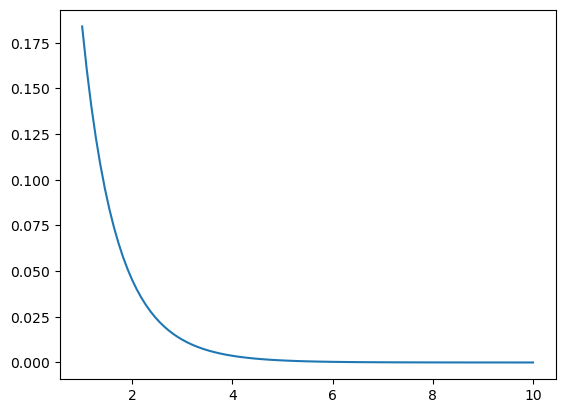

In [34]:
xval = np.linspace(1, 10, 100) 
f = lambda x: np.exp(-x)/(x+1)
plt.plot(xval, f(xval))

Como se aprecia el integrando muestra que sus valores son pequeños cuando $x$ está por encima de $6$ aproximadamente. Esto significa que estarías empleando la mayoría de las abscisas para integrar una pequeña cola de la función, lo cual aumentaría el costo numérico. `COMENTARIO:` para estudiar la convergencia se utiliza algunas de las fórmulas del error.

Una alternativa a la anterior es intentar MAPEAR el infinito a un valor finito, en este ejemplo se logra haciendo el cambio de variable $u=1/x$, lo que conduce a:
$$
I=\int_{0}^{1}\frac{e^{-1/u}}{u(u+1)}du
$$

Aunque ahora tenemos una singularidad en el origen. Un embargo podemos tratarla con alguna de las técnicas vistas anteriormente.

En ocasiones el MAPEO del infinito no es tan evidente, por ejemplo
$$
I=\int_{0}^{\infty}\frac{1}{\sqrt{x^8+x}}dx
$$

en este caso el cambio de variable $u=1/x$ no es factible puesto que nos mapea el $x=0$ al infinito. Sin embargo, un cambio de variable tipo $u=1/(1+x)$ si cumple este objetivo, quedando:
$$
I=\int_{0}^{1}\frac{u^2}{\sqrt{(1-u)^8+u^7(1-u)}}du
$$

Nuevamente tenemos una singularidad, en este caso a la derecha, pero podemos tratarla con las metodologías anteriores. 

Una segunda vía que podíamos usar era dividir la integral en subintervalos
$$
I=\int_{0}^{\infty}\frac{1}{\sqrt{x^8+x}}dx=\int_{0}^{1}\frac{1}{\sqrt{x^8+x}}dx+\int_{1}^{\infty}\frac{1}{\sqrt{x^8+x}}dx
$$
donde ahora si podemos usar el cambio de variable $u=1/x$ en la segunda integral y mapear el infinito. Notar que la primera integral tiene una singularidad en $x=0$ pero la podemos tratar con las metodologías vistas, en particular definiendo $u=\sqrt{x}$.

## Integrales multidimensionales

La forma más sencilla de tratar las integrales multidimensionales es mediante el teorema de **Fubini**, según el cual una integral multidimensional se escribe como una secuencia de integrales unidimensionales iteradas. Es decir, por ejemplo, 

<center><img src="capturas/120.png"></center>



Puede ser expresada su primera integral como

<center><img src="capturas/121.png"></center>

Donde se fijó a $y$ para hacer la integración por $x$. Luego se realiza la segunda integral como

<center><img src="capturas/125.png"></center>

Notar que en ambos casos las convertimos en integrales 1D dimensionales.

Ahora, numéricamente si usamos los métodos estandar de cuadratura (Newton-Cotes o Gauss-Legendre), estas integrales se expresarían como
<center><img src="capturas/122.png"></center>

y 

<center><img src="capturas/123.png"></center>

respectivamente. Lo que nos lleva a

<center><img src="capturas/124.png"></center>

`COMENTARIO:` Para integrales multidimensionales, este enfoque suele ser muy tardado si se desea una buena resolución. Al finalizar el curso (en la parte de estadística) veremos que existe un método de integración conocido como Montecarlo que es independiente de la dimensionalidad de la integral.

In [ ]:
def gauInt(f, interv, Npts, delt=0.2, Nit=1000, error='dist', eps=1e-05):
    a, b = min(interv), max(interv)
    
    # cantidades necesarias
    xs, cs = gau_param(Npts, delt=delt, Nit=Nit, error=error, eps=eps)
    
    # términos que escalan a xk
    coeffp = 0.5*(b+a)
    coeffm = 0.5*(b-a)
    
    ts = coeffp + coeffm*xs  # introducimos la nueva variable t 
    fk = cs*f(ts)
    val = coeffm*np.sum(fk)
    return val

<center><img src="capturas/124.png"></center>

In [62]:
def escala(interv1):
    a, b = interv1
    coeffpx1, coeffmx1 = 0.5*(b+a), 0.5*(b-a)
    return coeffpx1, coeffmx1

# Implementación
def gauInt2Dv1(f, interv1, interv2, Npts1, Npts2=None, delt=0.2, Nit=1000, error='dist', eps=1e-05):
    
    # cantidades necesarias
    xi, ci = gau_param(Npts1, delt=delt, Nit=Nit, error=error, eps=eps)
    if Npts2 is None:
        yj, cj = np.copy(xi), np.copy(ci)
    else:
        yj, cj = gau_param(Npts2, delt=delt, Nit=Nit, error=error, eps=eps)
    
    valIntx = []
    coeffpx, coeffmx = escala(interv1)
    coeffpy, coeffmy = escala(interv2)
    for i in range(len(xi)):
        x = xi[i]
        tx = coeffpx + coeffmx*x
        valInty = []
        for j in range(len(yj)):
            y = yj[j]
            ty = coeffpy + coeffmy*y
            fk = (ci[i]*cj[j]*f(tx, ty))*coeffmx*coeffmy
            
            valInty.append(fk)
        valIntx.append(valInty)
    
    val = np.sum(valIntx)
    return val

# Implementación abreviada
def gauInt2Dv2(f, interv1, interv2, Npts1, Npts2=None, delt=0.2, Nit=1000, error='dist', eps=1e-05):    
    
    # cantidades necesarias
    xi, ci = gau_param(Npts, delt=delt, Nit=Nit, error=error, eps=eps)
    if Npts2 is None:
        yj, cj = np.copy(xi), np.copy(ci)
    else:
        yj, cj = gau_param(Npts2, delt=delt, Nit=Nit, error=error, eps=eps)
    
    # escalando
    coeffpx, coeffmx = escala(interv1)
    coeffpy, coeffmy = escala(interv2)
    ti = coeffpx + coeffmx*xi
    tj = coeffpy + coeffmy*yj
    
    # creando una malla
    Ci, Cj = np.meshgrid(ci, cj)
    Xi, Yj = np.meshgrid(ti, tj)
    
    fij = f(Xi, Yj)
    fk = Ci*Cj*fij
    val = coeffmx*coeffmy*np.sum(fk)
    return val

In [64]:
f = lambda x, y: x*y
    
valComp = 4.
print('Valor ', valComp)

interv1 = [0, 2]  # x intervalo
interv2 = [0, 2]  # y intervalo

for Npts in range(2, 10):
    val = gauInt2Dv1(f, interv1, interv2, Npts, eps=1e-11)
    print('===> ', Npts, 'valor ', val, 'Abs', abs(valComp-val))
    val = gauInt2Dv2(f, interv1, interv2, Npts, eps=1e-11)
    print('===> ', Npts, 'valor ', val, 'Abs', abs(valComp-val))
    print()

Valor  4.0
===>  2 valor  4.000000000000002 Abs 1.7763568394002505e-15
===>  2 valor  4.000000000000002 Abs 1.7763568394002505e-15

===>  3 valor  3.999999999999996 Abs 3.9968028886505635e-15
===>  3 valor  3.999999999999996 Abs 3.9968028886505635e-15

===>  4 valor  3.9999999999999996 Abs 4.440892098500626e-16
===>  4 valor  3.9999999999999996 Abs 4.440892098500626e-16

===>  5 valor  3.999999999999998 Abs 2.220446049250313e-15
===>  5 valor  3.999999999999998 Abs 2.220446049250313e-15

===>  6 valor  4.0 Abs 0.0
===>  6 valor  4.0 Abs 0.0

===>  7 valor  4.000000000000001 Abs 8.881784197001252e-16
===>  7 valor  4.000000000000001 Abs 8.881784197001252e-16

===>  8 valor  4.0 Abs 0.0
===>  8 valor  4.0 Abs 0.0

===>  9 valor  4.000000000000001 Abs 8.881784197001252e-16
===>  9 valor  4.000000000000001 Abs 8.881784197001252e-16



In [65]:
f = lambda x, y: x*y**2
    
valComp = 2/3.
print('Valor ', valComp)

interv1 = [0, 2]
interv2 = [0, 1]

for Npts in range(2, 10):
    val = gauInt2Dv2(f, interv1, interv2, Npts, eps=1e-11)
    print('===> ', Npts, 'valor ', val, 'Abs', abs(valComp-val))

Valor  0.6666666666666666
===>  2 valor  0.666666666666667 Abs 3.3306690738754696e-16
===>  3 valor  0.6666666666666661 Abs 5.551115123125783e-16
===>  4 valor  0.6666666666666666 Abs 0.0
===>  5 valor  0.6666666666666662 Abs 4.440892098500626e-16
===>  6 valor  0.6666666666666667 Abs 1.1102230246251565e-16
===>  7 valor  0.6666666666666669 Abs 2.220446049250313e-16
===>  8 valor  0.6666666666666667 Abs 1.1102230246251565e-16
===>  9 valor  0.6666666666666669 Abs 2.220446049250313e-16


In [66]:
f = lambda x, y: np.exp(x)*y
    
valComp = 12.7781
print('Valor ', valComp)

interv1 = [0, 2]
interv2 = [0, 2]

for Npts in range(2, 10):
    val = gauInt2Dv2(f, interv1, interv2, Npts, eps=1e-11)
    print('===> ', Npts, 'valor ', val, 'Abs', abs(valComp-val))

Valor  12.7781
===>  2 valor  12.736216410734237 Abs 0.04188358926576363
===>  3 valor  12.777756327974224 Abs 0.0003436720257763426
===>  4 valor  12.778110593361603 Abs 1.0593361603028484e-05
===>  5 valor  12.77811219337734 Abs 1.2193377338931555e-05
===>  6 valor  12.778112197852776 Abs 1.2197852775841511e-05
===>  7 valor  12.77811219786129 Abs 1.2197861289919842e-05
===>  8 valor  12.7781121978613 Abs 1.2197861300577983e-05
===>  9 valor  12.778112197861304 Abs 1.2197861304130697e-05


### Tarea
- Intentar generalizarlo para recibir una o dos funciones en el intervalo para y
- Intentar generalizarlo para 3D.

### Resumen

En esta lectura hemos presentado las principales técnicas de cuadraturas, señalándose sus virtudes y debilidades. A continuación presentamos una guia (no es un mandamiento) para resolver las integrales numéricamentes:
- Analizar el integrando, identificando singularidades, mapeando límites infinitos, etc. En caso de econtrarse las primeras (singularidades) usar trucos analíticos para removerlas, anticipando así un crecimiento del error producto de estas.
- Si el integrando es periódico y se integra en un período completo (o varios períodos), la regla del trapezoide compuesto puede hacer un gran trabajo.
- Si su integral (propia o impropia) tiene una forma de cuadratura gaussiana estándar, debe usar los nodos y pesos tabulados.
- Para los integrandos en los que se necesita alta precisión la integración de Gauss-Legendre es la soluciones a elegir.
- Si no se está demasiado preocupado por la precisión pero necesita un error confiable (o si está obligado externamente a utilizar nodos igualmente espaciados), se ha de emplear una regla de Simpson adaptativa.
- Si se trata de una integral multidimensional, utilice la cuadratura Gaussiana en unas pocas dimensiones y Monte Carlo en muchas dimensiones.

## Comparación con `SciPy`

`SciPy` proporciona una serie de funciones para diferentes tipos de cuadratura, por ejemplo, `quad`,` dblquad` y `tplquad` para integrales simples, dobles y triples, respectivamente.

In [ ]:
from scipy.integrate import quad, dblquad, tplquad

La función `quad` toma una gran cantidad de argumentos opcionales, que se pueden usar para ajustar el comportamiento de la función (prueba con` help (quad) `para más detalles).

El uso básico es el siguiente:

$f(x)=x$

In [ ]:
x_lower = 0 # límite inferior de x
x_upper = 1 # límite superior de x

val, abserr = quad(f, x_lower, x_upper)

print("integral value =", val, ", absolute error =", abserr) 

Si necesitamos pasar argumentos adicionales a la función integrando, podemos usar el argumento de palabra clave `args`:

In [ ]:
def integrand(x, A):  # notar que primero es la variable y luego los argumentos
    return A*np.exp(x)


x_lower = 0 # límite inferior de x
x_upper = 10 # límite superior de x

val, abserr = quad(integrand, x_lower, x_upper, args=(3,))

print(val, abserr) 

Tambien se pueden calcular integrales tipo

$$\lim_{b\to 00}\lim_{a\to-oo}\int_{a}^{b} e^{-x^{2}}dx$$

In [ ]:
val, abserr = quad(lambda x: np.exp(-x**2), -np.Inf, np.Inf)  # demostrar

print("numerical  =", val, abserr)

analytical = np.sqrt(np.pi)
print("analytical =", analytical)

Para el caso de integración de dimensiones superiores funciona de la misma manera:

In [ ]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)

print(val, abserr)

Observe cómo tuvimos que pasar funciones lambda para los límites de la integración y, ya que estas en general pueden ser funciones de x. Sin embargo no es siempre necesario

In [ ]:
val, abserr = dblquad(integrand, x_lower, x_upper, y_lower, y_upper)
print(val, abserr)